# Exploratory Data Analysis on Loan Data from Prosper
## by Obimba Smart Chukwunenye


## Investigation Overview


- This project aims to understand the factors that affect loan status. For a credible analysis, I decided to analyse loans that are not current. This includes, Past due, Defaulted, Chargedoff and completed loans. Because of this about 50% of the data were removed.

- On bivariate exploration, I found out that completed loans have very much lower `Interest rate` less than 20%, while the other categories with interest rate more than 20%

- Similar to the first finding, completed loans also showed very low DebtToIncomeRatio while the other categories were much higher

- Owning a home tells a little of of someone's financial status/monthly income. My analysis revealed that loanees who recieved more than 15k/month were mostly home owners

- Monthly Income has an effect on DebtToIncomeRatio: a higher monthly income will definitely reduce the DTI ratio than a lower one

- What I discovered was that, loanees who completed thier loans recieved more monthly income, borrowed lesser amount, and consequently had lesser DTI ratio. This made it easy for them to complete there loan debts. On the other hand, Incomplete loans (Defaulted, Chargedoff, Past due) was as a result of either low monthly income,  high loan amount, which consequently resulted to a very high Debt-to-income ratio 




## Dataset Overview

The data set contains `113,937` loans with `81` variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. See this data [dictionary](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0) to understand the dataset's variables.


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
loan_data = pd.read_csv('./data/clean_loan_df.csv')

In [3]:
loan_data.shape

(50716, 17)

## Interest Rate on loan Status
Completed loans have very much lower Interest rate than the other categories with a median interest rate lower than 20%. We can see the shape of the violin plot decreasing as the interest rate increases. This shows that the majority of the loans completed had much lower interest rate

On the other hand we see a different distribution for the other Loan Status with interest rates more than 20% and even more than 30% for charged-off loans. Loans that have been due show an increasing loan rate as the shape of the violin plot gets broader. We can also see the violin plot for Past due loans reaching it's maximum width at more than 30% rate. The same information holds for loans that are defaulted and charged off

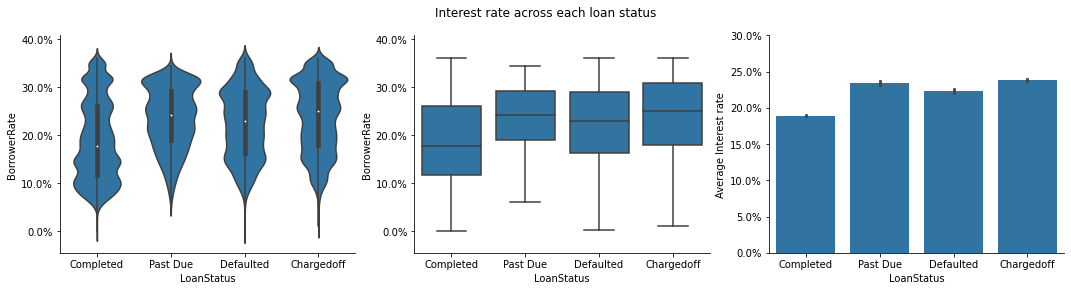

In [4]:
fig = plt.figure(figsize=[18, 4])
color = color=sb.color_palette()[0]

ax1 = plt.subplot(1,3,1)
g = sb.violinplot(data=loan_data, x='LoanStatus', y='BorrowerRate', color=color)
plt.yticks(g.get_yticks(), ['{:,.1f}%'.format(x*100) for x in g.get_yticks()]);
sb.despine(bottom = False, left = False)

plt.subplot(1,3,2, sharey=ax1)
g = sb.boxplot(data=loan_data, x='LoanStatus', y='BorrowerRate', color=color)
sb.despine(bottom = False, left = False)

plt.subplot(1,3,3)
g = sb.barplot(data=loan_data, x='LoanStatus', y='BorrowerRate', color=color);
plt.ylabel('Average Interest rate');
plt.yticks(g.get_yticks(), ['{:,.1f}%'.format(x*100) for x in g.get_yticks()]);
sb.despine(bottom = False, left = False)

fig.suptitle('Interest rate across each loan status');

## Debt-To-Income-Ratio on loan status

We see almost similar distribution from ealier chart. Completed loans have a mean DTI ratio slightly about 20% with lower bound and upper bound of 0 - 50% DTI. We can also see outliers stretching from 50% up to 80%. This is slightly different from the other three categories: which have a median DTI ratio more than 20%. 

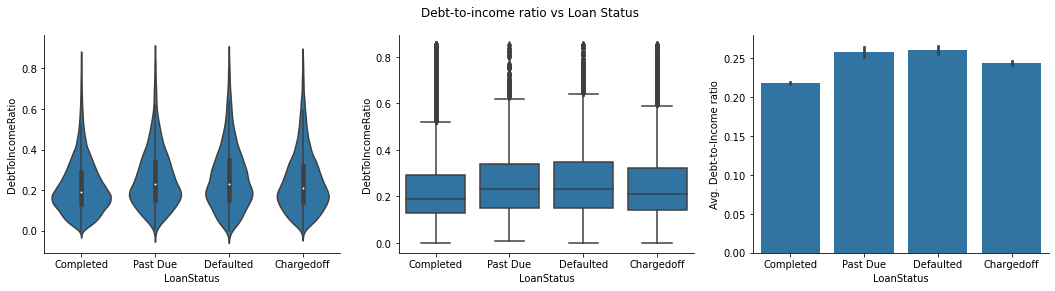

In [5]:
plt.figure(figsize=[18, 4])
color = color=sb.color_palette()[0]

sub_data = loan_data[loan_data.DebtToIncomeRatio <=.85]
plt.subplot(1,3,1)
sb.violinplot(data=sub_data, x='LoanStatus', y='DebtToIncomeRatio', color=color)
sb.despine(bottom = False, left = False)

plt.subplot(1,3,2)
sb.boxplot(data=sub_data, x='LoanStatus', y='DebtToIncomeRatio', color=color)
sb.despine(bottom = False, left = False)

plt.subplot(1,3,3)
sb.barplot(data=sub_data, x='LoanStatus', y='DebtToIncomeRatio', color=color);
plt.ylabel('Avg. Debt-to-Income ratio');
plt.suptitle('Debt-to-income ratio vs Loan Status')
sb.despine(bottom = False, left = False)


## The effect of Monthly Income, Monthly loan payment and Debt-to-Income ratio on Loan Status

The formula below gives the relationship between the three variables. For an optimal, low Debt-to-income ratio, one needs to earn higher and pay less monthly. In other words, monthly loan payment should be small when compared with the Monthly income

Interestingly, the same relation holds in this data.The chart below shows similar relationship. Loanees who completed thier loans recieved more monthly income, payed lesser amount monthly, and consequently had lesser DTI ratio. This made it easy for them to complete there loan debts. On the other hand, Incomplete loans (Defaulted, Chargedoff, Past due) was as a result of either low monthly income,  or/and high high monthly loan payment, which consequently resulted to a very high Debt-to-income ratio

Because high monthly-income and low monthly-payment reduces the Debt-To-Income ratio of a loanee, and lower DTI shows lower risk and tendency of completing the loan. These three variables tell alot about the risk of an individual collecting a loan
$$
DebtToIncomeRatio = \frac{MonthlyLoanPayment}{StatedMonthlyIncome}
$$

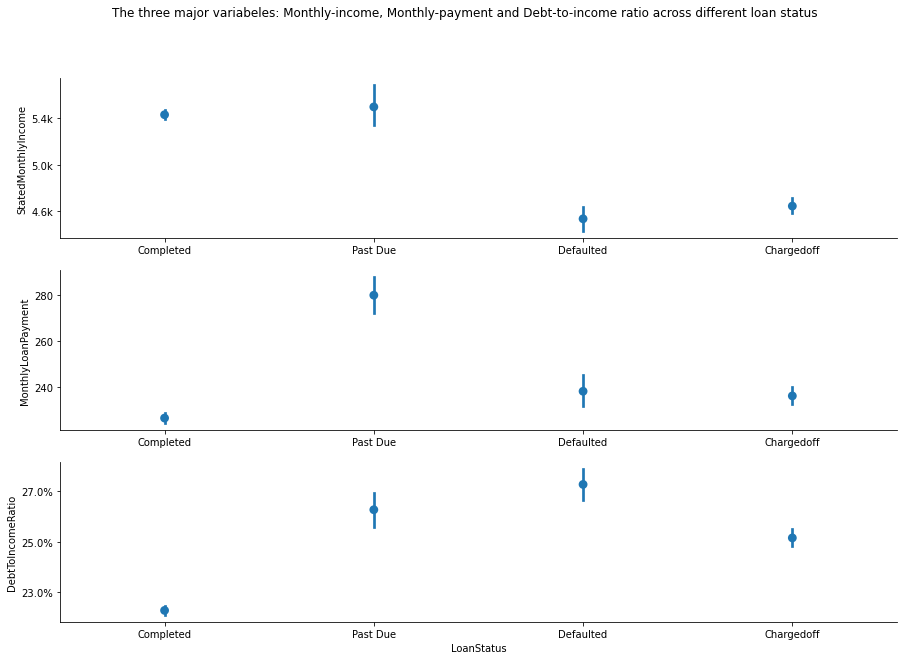

In [6]:
sub_data = loan_data[loan_data.DebtToIncomeRatio <= 1.4]
sub_data = sub_data[sub_data.StatedMonthlyIncome <= 60000]

plt.figure(figsize=[15, 10])
plt.subplot(3, 1, 1)
ax1 = sb.pointplot(data=sub_data,  y = 'StatedMonthlyIncome', x='LoanStatus', linestyles='')
plt.yticks(ax1.get_yticks(), ['{:,.1f}k'.format(x/1000) for x in ax1.get_yticks()]);
plt.locator_params(axis='y', nbins=5)
sb.despine(bottom = True, left = False)
plt.xlabel('')

plt.subplot(3, 1, 2, sharex=ax1)
sb.pointplot(data=sub_data,  y = 'MonthlyLoanPayment', x='LoanStatus', linestyles='')
plt.xlabel('')
sb.despine(bottom = True, left = False)
plt.locator_params(axis='y', nbins=5)

plt.subplot(3, 1, 3, sharex=ax1)
g = sb.pointplot(data=sub_data,  y = 'DebtToIncomeRatio', x='LoanStatus', linestyles='');
plt.suptitle('The three major variabeles: Monthly-income, Monthly-payment and Debt-to-income ratio across different loan status');
plt.yticks(g.get_yticks(), ['{:,.1f}%'.format(x*100) for x in g.get_yticks()]);
sb.despine(bottom = False, left = False)
plt.locator_params(axis='y', nbins=5)